In [255]:
# Import stuff
import numpy as n
import pandas as p
import seaborn as s
from matplotlib import pyplot as pp
import stats
import time
s.set_theme(font_scale = 1.2, font = 'Times')

In [3]:
#read in file
adults = p.read_csv('data/adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
)

In [4]:
#make sure it works
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [83]:
#B) i)
per_25 = stats.quantile(adults['education-num'], 0.25)
per_50 = stats.quantile(adults['education-num'], 0.50)
per_75 = stats.quantile(adults['education-num'], 0.75)
per_99 = stats.quantile(adults['education-num'], 0.99)

print(f'==========================\nEducation-num Percentiles:\n==========================\n25th ~> {per_25}\n50th ~> {per_50}\n75th ~> {per_75}\n99th ~> {per_99}')

Education-num Percentiles:
25th ~> 9
50th ~> 10
75th ~> 12
99th ~> 16


Quartile Probability to make >$50K
Q1 ~> 0.0574
Q2 ~> 0.1721
Q3 ~> 0.2556
Q4 ~> 0.4846


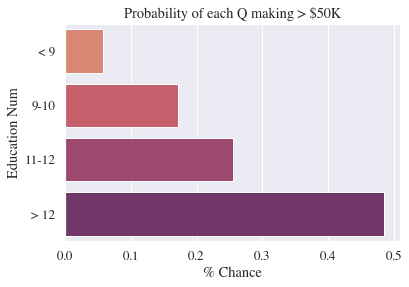

As you can see, higher levels of education result in a higher chance of making > $50k annually.


In [111]:
#B) ii)
#get the total number of adults from 0-25 (education-num < 9)
total_low = len(adults[['education-num','income']][(adults['education-num'] < per_25)])
#get the number of adults from 0-25 that make >50K
rich_low = len(adults[['education-num','income']][(adults['education-num'] < per_25) & (adults['income'] == '>50K')])
prob_rich_low = rich_low / total_low

#get the total number of adults from 26-50 (education-num == 9 or 10)
total_mid = len(adults[['education-num','income']][(adults['education-num'] == 9 )])
total_mid += len(adults[['education-num','income']][(adults['education-num'] == 10 )])
#get the number of adults from 26-50 that make >50K
rich_mid = len(adults[['education-num','income']][(adults['education-num'] == 9) & (adults['income'] == '>50K')])
rich_mid += len(adults[['education-num','income']][(adults['education-num'] == 10) & (adults['income'] == '>50K')])
prob_rich_mid = rich_mid / total_mid

#get the total number of adults from 51-75 (education-num == 11 or 12)
total_high = len(adults[['education-num','income']][(adults['education-num'] == 11 )])
total_high += len(adults[['education-num','income']][(adults['education-num'] == 12 )])
#get the number of adults from 51-75 that make >50K
rich_high = len(adults[['education-num','income']][(adults['education-num'] == 11) & (adults['income'] == '>50K')])
rich_high += len(adults[['education-num','income']][(adults['education-num'] == 12) & (adults['income'] == '>50K')])
prob_rich_high = rich_high / total_high

#get the total number of adults from 76-100 (education-num > 12)
total_max = len(adults[['education-num','income']][(adults['education-num'] > per_75)])
#get the number of adults from 76-100 that make >50K
rich_max = len(adults[['education-num','income']][(adults['education-num'] > per_75) & (adults['income'] == '>50K')])
prob_rich_max = rich_max / total_max


#graph them
ax = s.barplot(x = [prob_rich_low, prob_rich_mid, prob_rich_high, prob_rich_max], y = ['< 9', '9-10', '11-12', '> 12'], palette = 'flare')
ax.set(title = "Probability of each Q making > $50K")
ax.set(xlabel = "% Chance")
ax.set(ylabel = "Education Num")

#explain
print("==================================\nQuartile Probability to make >$50K\n==================================")
print(f'Q1 ~> {round(prob_rich_low, 4)}\nQ2 ~> {round(prob_rich_mid, 4)}\nQ3 ~> {round(prob_rich_high, 4)}\nQ4 ~> {round(prob_rich_max, 4)}')
pp.show()
print("As you can see, higher levels of education result in a higher chance of making > $50k annually.")

Generally speaking, the higher the education number, the greater probability of making > $50K.
Data for the graph given below.


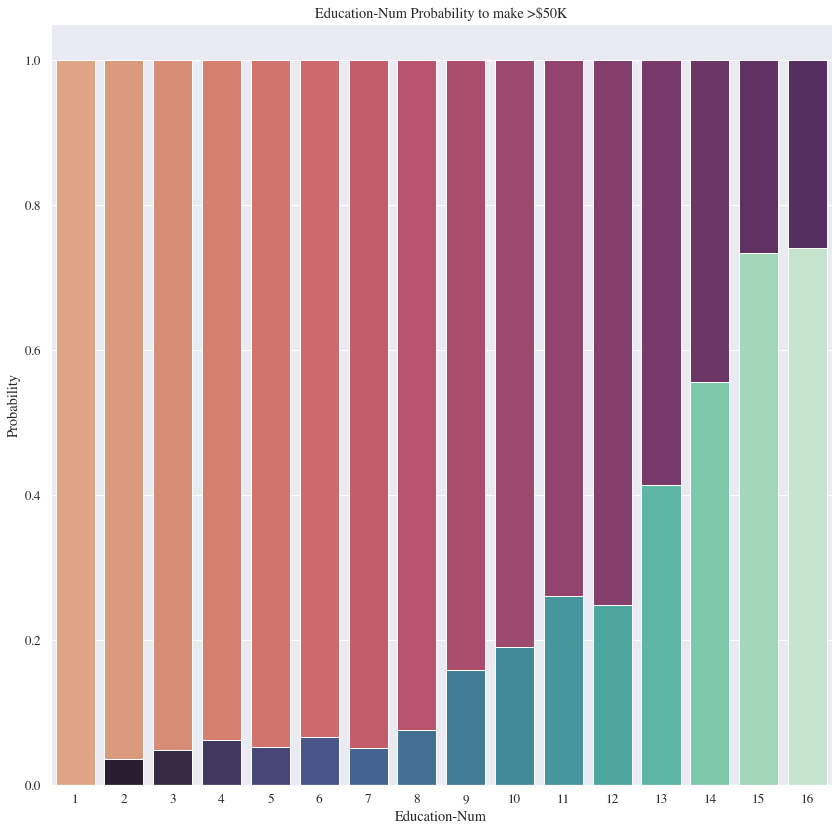

,education-num,prob_rich,prob_poor
0,16,0.740920,0.259080
1,15,0.734375,0.265625
2,14,0.556587,0.443413
3,13,0.414753,0.585247
4,11,0.261216,0.738784
5,12,0.248360,0.751640
6,10,0.190235,0.809765
7,9,0.159509,0.840491
8,8,0.076212,0.923788
9,6,0.066452,0.933548


In [242]:
#B iii)
#create smaller dataframe
ed_num = p.DataFrame()

ed_num['<=50K'] = adults[['education-num', 'income']][adults['income'] == '<=50K'].groupby('education-num').count()
ed_num['>50K'] = adults[['education-num', 'income']][adults['income'] == '>50K'].groupby('education-num').count()
ed_num['Total'] = adults[['education-num', 'income']].groupby('education-num').count()
ed_num = ed_num.fillna(0) #fill NaN with zeros

#get probabilities of each
ed_num['prob_rich'] = ed_num['>50K'] / ed_num['Total']
ed_num['prob_poor'] = ed_num['<=50K'] / ed_num['Total']
ed_num['prob_total'] = ed_num['Total'] / ed_num['Total']

"""
plotting/explaination section
"""
pp.figure(figsize = (14,14))

#plot prob_total
ax2 = ed_num[['prob_rich', 'prob_poor', 'prob_total']].sort_values('prob_rich', ascending = False).reset_index()
s.barplot(x = ax2['education-num'], y = ax2['prob_total'], palette = 'flare')

#plot prob_rich
s.barplot(x = ax2['education-num'], y = ax2['prob_rich'], palette = 'mako')

#make pretty
pp.title("Education-Num Probability to make >$50K")
pp.xlabel("Education-Num")
pp.ylabel("Probability")

print("Generally speaking, the higher the education number, the greater probability of making > $50K.")
print("Data for the graph given below.")
pp.show()
ax2[['education-num', 'prob_rich', 'prob_poor']]

In [259]:
# B) iv) I want to time to see how long it will take :)

#took around 63 seconds to complete the cov of a chunk size 4000 :3
#the cov for this was ~ 5.34
#head = adults.head(4000)

"""
This is the code that gets the cov of the data set, it takes around 70 minutes to run :)

start = time.time()
cv = stats.cov(adults['hours-per-week'], adults['education-num'])
end = time.time()

print(f'Time to calculate Covariance ~> {round(end - start, 4)} seconds')
cv
"""

#print out values hard coded to save time and effort
cv = 4.705193436213586
time = 4226.1184

print(f'Covariance of the dataset ~> {cv}\nTime to calculate Covariance ~> {time}')

Covariance of the dataset ~> 4.705193436213586
Time to calculate Covariance ~> 4226.1184


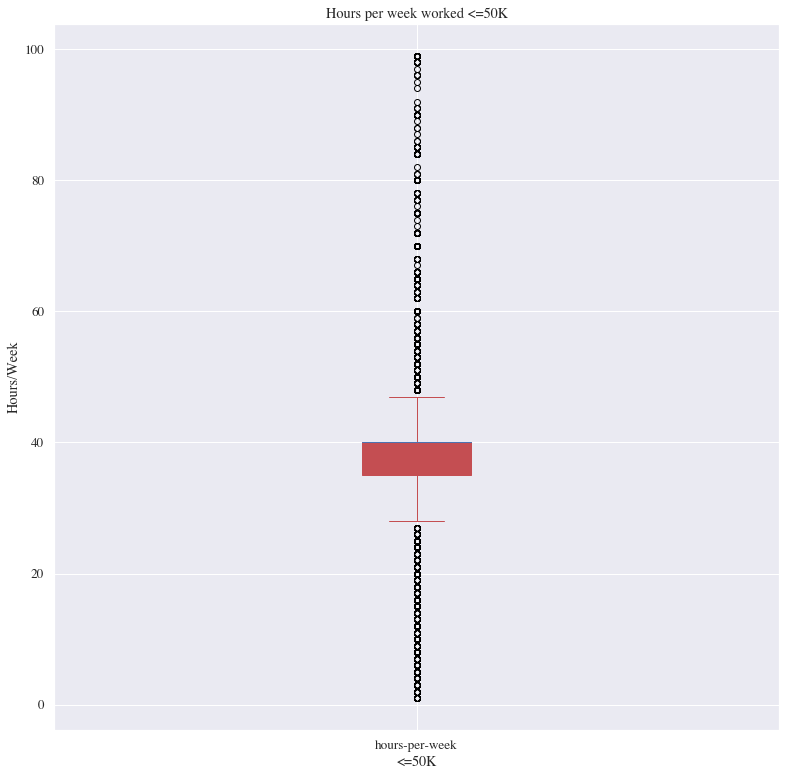

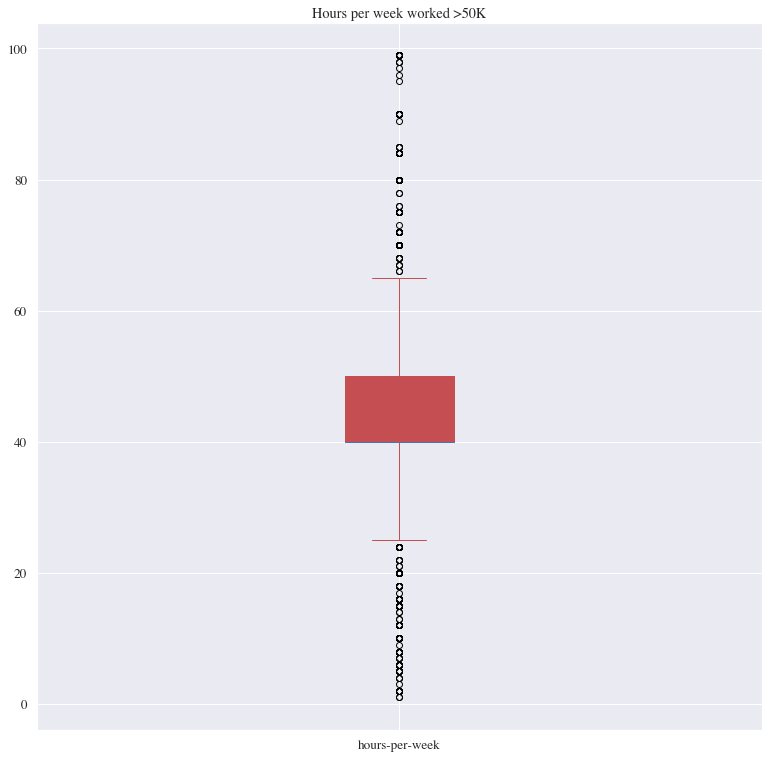

There are a ton of outliers here because the dataset is so large, it looks much worse than it actually is.


In [336]:
# B) v)

#split into two dataframes
poor = adults[['hours-per-week', 'income']][adults['income'] == '<=50K']
rich = adults[['hours-per-week', 'income']][adults['income'] == '>50K']

#create boxplot for both
pp.figure(figsize = (13,13))
boxplot_poor = poor.boxplot(column = ['hours-per-week'], patch_artist = True, 
                            color=dict(boxes='r', whiskers='r', medians='b', caps='r'))
boxplot_poor.set(title = "Hours per week worked <=50K")
boxplot_poor.set(xlabel = "<=50K")
boxplot_poor.set(ylabel = "Hours/Week")
pp.show()

pp.figure(figsize = (13,13))
boxplot_rich = rich.boxplot(column = ['hours-per-week'], patch_artist = True,
                           color=dict(boxes='r', whiskers='r', medians='b', caps='r'))
boxplot_rich.set(title = "Hours per week worked >50K")
boxplot_poor.set(xlabel = ">50K")
boxplot_poor.set(ylabel = "Hours/Week")
pp.show()
print("There are a ton of outliers here because the dataset is so large, it looks much worse than it actually is.")

I split up the data set for <=50K into 6 box plots. They are displayed below:





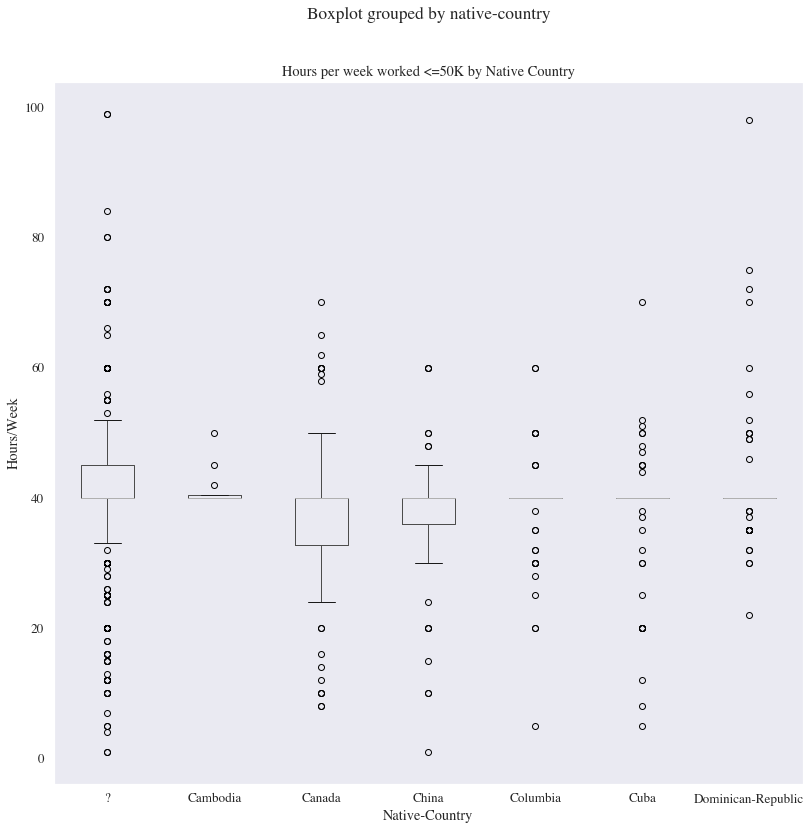

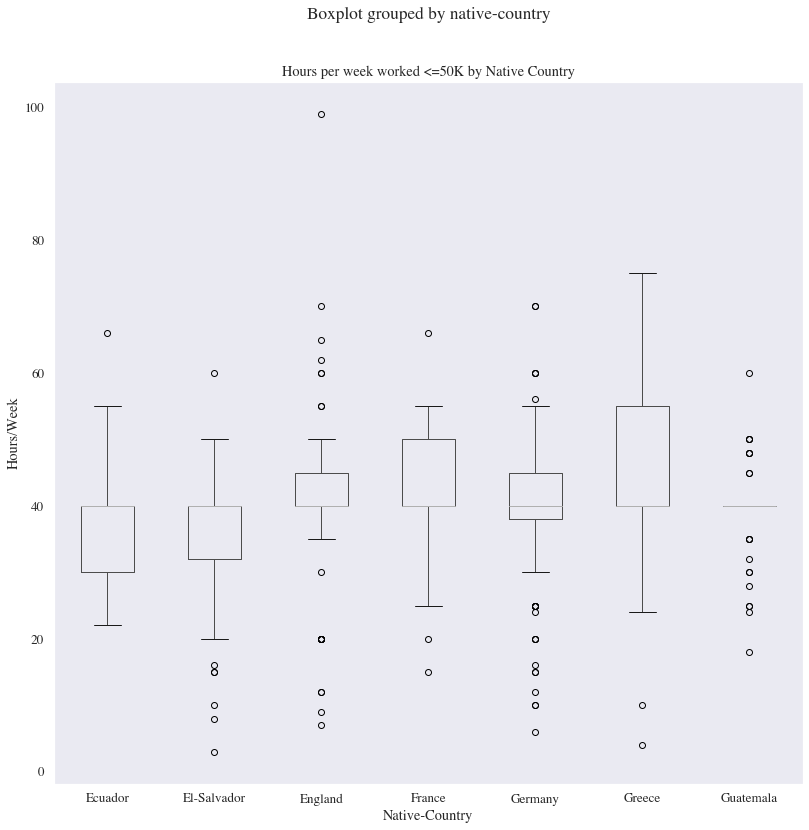

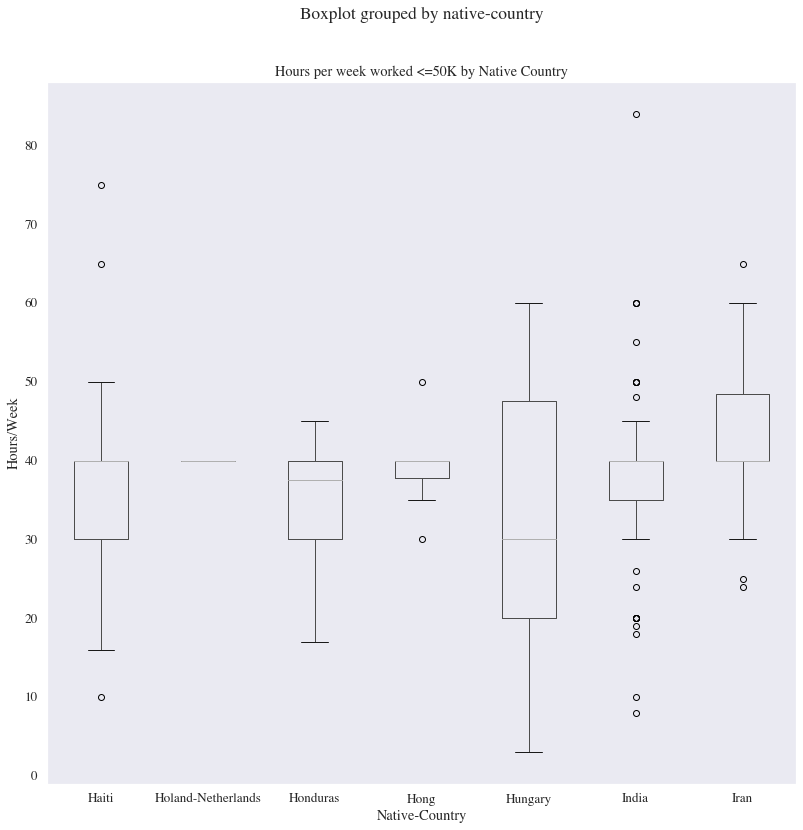

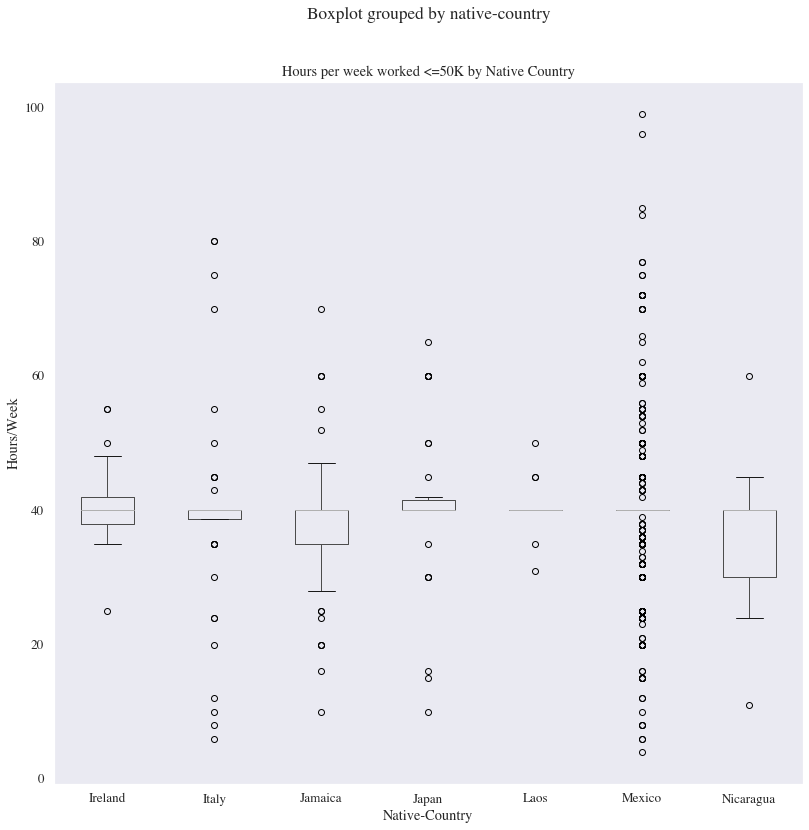

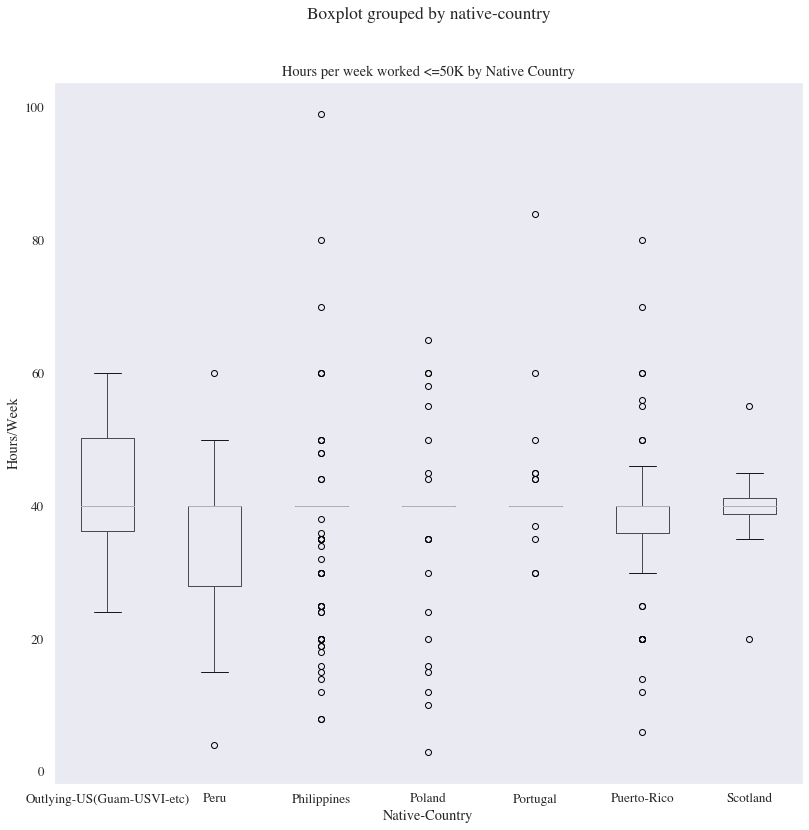

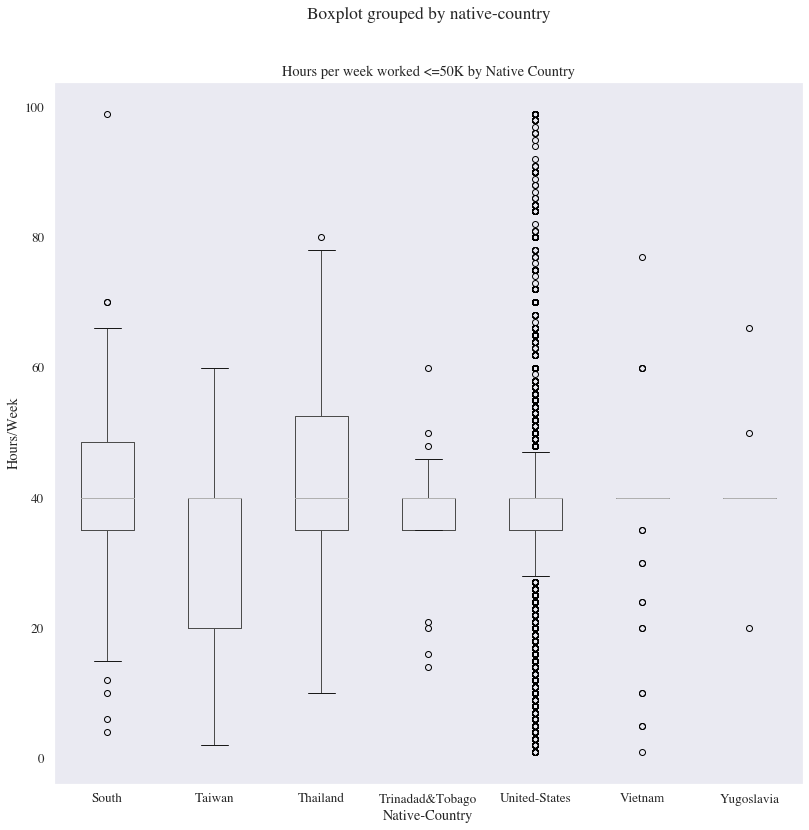




I split up the data set for >50K into 5 box plots. They are displayed below:





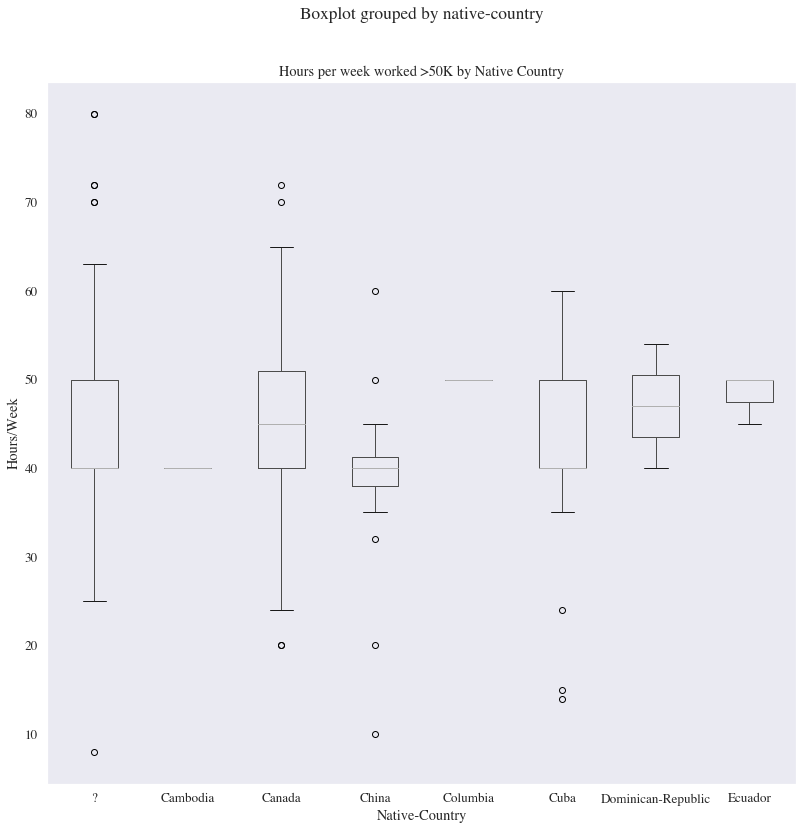

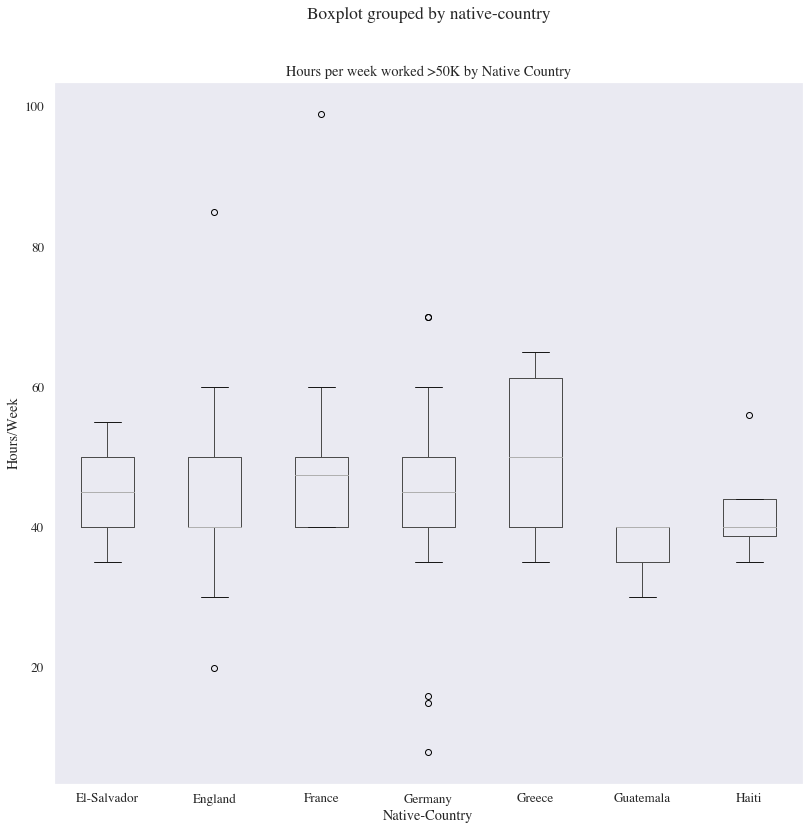

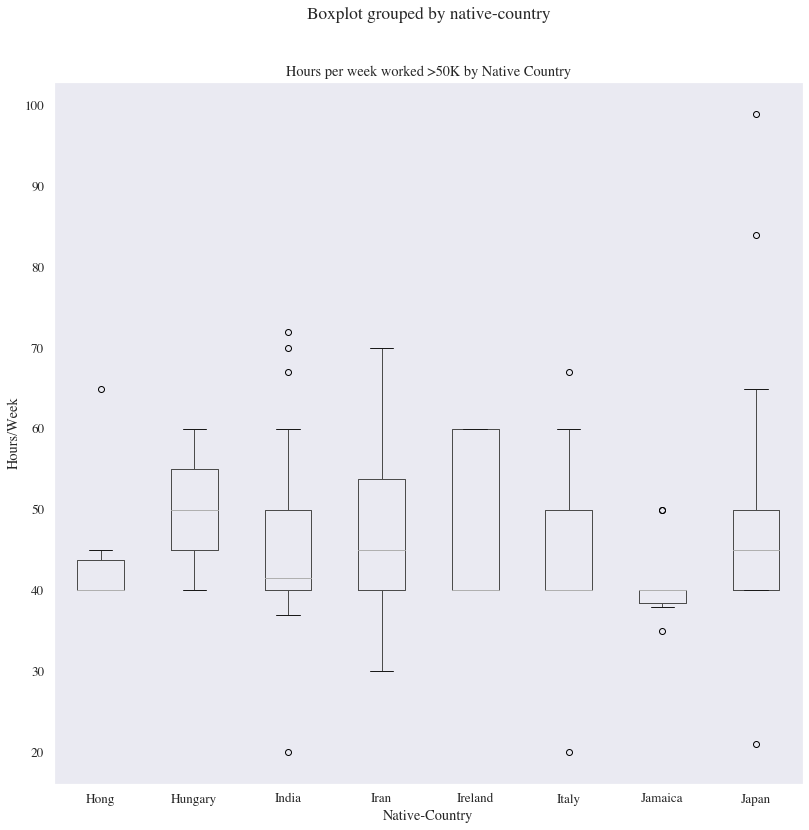

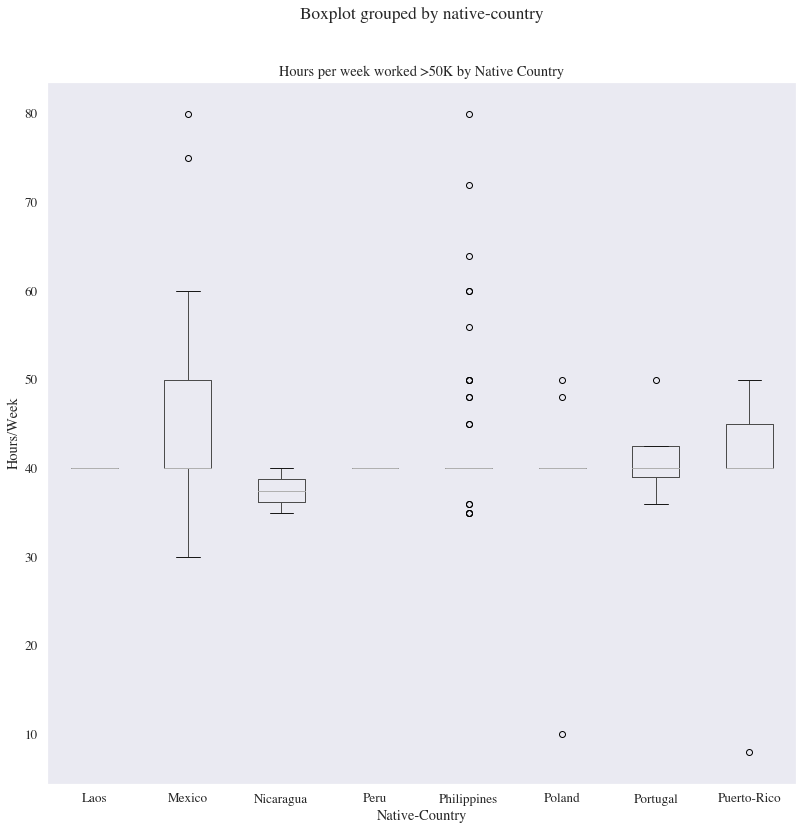

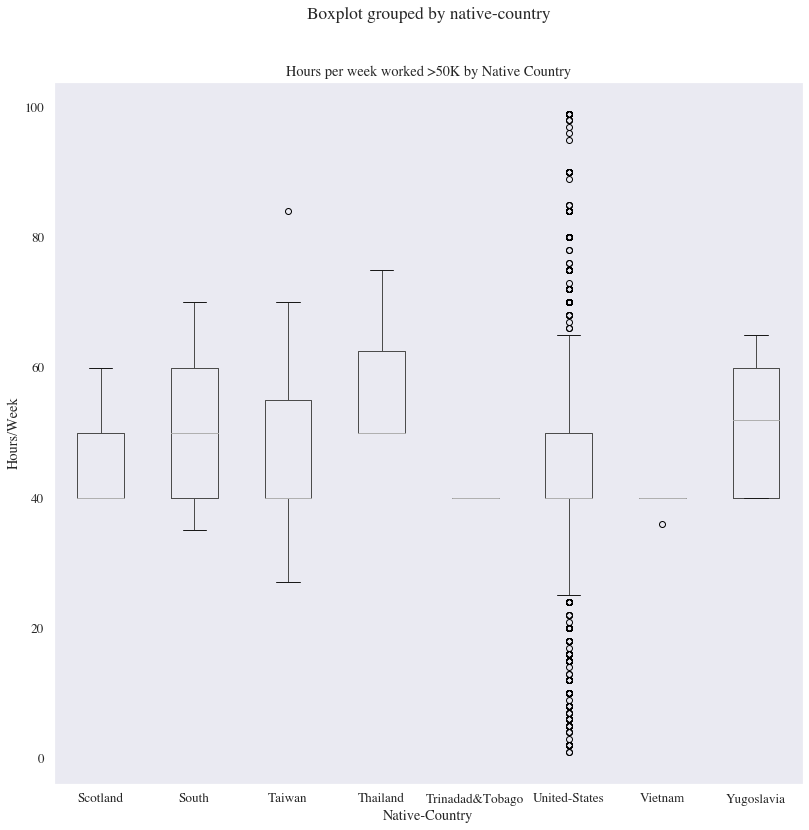

In [460]:
# B) vi)
#split into two dataFrames
NC_poor = adults[['native-country', 'hours-per-week', 'income']][adults['income'] == '<=50K'].sort_values('native-country')
NC_poor_count = NC_poor.groupby('native-country').count()

NC_rich = adults[['native-country', 'hours-per-week', 'income']][adults['income'] == '>50K'].sort_values('native-country')
NC_rich_count = NC_rich.groupby('native-country').count()

#print(f'{len(NC_poor)} {len(NC_rich)}') #gets size of each df

#split those dataFrames into smaller sets; NC_poor has length 42, so split into 6 plots. NC_rich has 40, so split into 5 plots
#NC_poor first
index = 0
print("I split up the data set for <=50K into 6 box plots. They are displayed below:\n\n\n")
for j in range(0,(int(len(NC_poor_count)/7))):
    #NC_poor_count[j:42:6]#little bit of mpi logic here ;)
    total = 0
    df = NC_poor_count[(j*7):((j*7)+7)]
    #get size of slice
    for i in range(0,len(df)):
        total += df['income'].iloc[i]
    boxplot_poor_C = NC_poor[index:(index+total)-1].boxplot(column = ['hours-per-week'], by = ['native-country'], 
                                                            layout = (1,1), figsize = (13,13), grid = False)
    boxplot_poor_C.set(title = "Hours per week worked <=50K by Native Country")
    boxplot_poor_C.set(xlabel = "Native-Country")
    boxplot_poor_C.set(ylabel = "Hours/Week")
    pp.show()
    #increment the starting index
    index += total

#now to do the NC_rich
index = 0
print("\n\n\nI split up the data set for >50K into 5 box plots. They are displayed below:\n\n\n")
for j in range(0,(int(len(NC_rich_count)/8))):
    total = 0
    df = NC_rich_count[(j*8):((j*8)+8)]
    #get size of slice
    for i in range(0,len(df)):
        total += df['income'].iloc[i]
    
    boxplot_rich_C = NC_rich[index:(index+total)-1].boxplot(column = ['hours-per-week'], by = ['native-country'], 
                                                            layout = (1,1), figsize = (13,13), grid = False)
    boxplot_rich_C.set(title = "Hours per week worked >50K by Native Country")
    boxplot_rich_C.set(xlabel = "Native-Country")
    boxplot_rich_C.set(ylabel = "Hours/Week")
    pp.show()
    
    #increment the starting index
    index += total

In [485]:
# B) vii)
#create a function based on example given in class
def display(x, y, z):
    return f'P({x}|{y}) = {z}'

In [532]:
#create df
df = adults[['education', 'education-num']]

#get probability of each item appearing
prob = df.groupby('education-num').size().div(len(df))

#get conditional probability
cond_prob = df.groupby(['education', 'education-num']).size().div(len(df)).div(prob, axis=0, level='education-num').reset_index()
cond_prob.set_axis(['education', 'education-num', 'cond_prob'], axis = 1, inplace = True)
#do what we did in class
table = n.array([""])
for i in range(0,len(cond_prob)):
       table = n.append(table, display(cond_prob['education'].iloc[i], cond_prob['education-num'].iloc[i], cond_prob['cond_prob'].iloc[i]))
df2 = p.DataFrame()
df2['Cond_prob'] = table
print("Since each column is only every going to have 1 outcome, the table is very small.")
df2

Since each column is only every going to have 1 outcome, the table is very small.


,Cond_prob
0,
1,P(10th|6) = 1.0
2,P(11th|7) = 1.0
3,P(12th|8) = 1.0
4,P(1st-4th|2) = 1.0
5,P(5th-6th|3) = 1.0
6,P(7th-8th|4) = 1.0
7,P(9th|5) = 1.0
8,P(Assoc-acdm|12) = 1.0
9,P(Assoc-voc|11) = 1.0


In [538]:
# B) viii)
#smaller df
df = adults[['marital-status', 'occupation']]

#get probability of each item appearing
prob = df.groupby('marital-status').size().div(len(df))

#get conditional probability
cond_prob = df.groupby(['marital-status', 'occupation']).size().div(len(df)).div(prob, axis=0, level='marital-status').reset_index()
cond_prob.set_axis(['marital-status', 'occupation', 'cond_prob'], axis = 1, inplace = True)

#do what we did in class
table = n.array([""])
for i in range(0,len(cond_prob)):
       table = n.append(table, display(cond_prob['marital-status'].iloc[i], cond_prob['occupation'].iloc[i], cond_prob['cond_prob'].iloc[i]))
df2 = p.DataFrame()
df2['Cond_prob'] = table
print("Since each column is only every going to have 1 outcome, the table is very small.")
df2

Since each column is only every going to have 1 outcome, the table is very small.


,Cond_prob
0,
1,P(Divorced|?) = 0.04163853252307
2,P(Divorced|Adm-clerical) = 0.18433490884537473
3,P(Divorced|Craft-repair) = 0.10443394103083502
4,P(Divorced|Exec-managerial) = 0.1359441818591042
...,...
92,P(Widowed|Prof-specialty) = 0.09264853977844914
93,P(Widowed|Protective-serv) = 0.009063444108761328
94,P(Widowed|Sales) = 0.10574018126888217
95,P(Widowed|Tech-support) = 0.019133937562940583


In [556]:
#B) ix)
df = adults[['occupation', 'income']]

#get probability of each item appearing
prob = df.groupby('occupation').size().div(len(df))

#get conditional probability
cond_prob = df.groupby(['occupation', 'income']).size().div(len(df)).div(prob, axis=0, level='occupation').reset_index()
cond_prob.set_axis(['occupation', 'income', 'cond_prob'], axis = 1, inplace = True)

#do what we did in class
table = n.array([""])
for i in range(0,len(cond_prob)):
       table = n.append(table, display(cond_prob['occupation'].iloc[i], cond_prob['income'].iloc[i], cond_prob['cond_prob'].iloc[i]))
df2 = p.DataFrame()
df2['Cond_prob'] = table
print("Since each column is only every going to have 1 outcome, the table is very small.")
df2

Since each column is only every going to have 1 outcome, the table is very small.


,Cond_prob
0,
1,P(?|<=50K) = 0.8963646228974498
2,P(?|>50K) = 0.1036353771025502
3,P(Adm-clerical|<=50K) = 0.8655172413793103
4,P(Adm-clerical|>50K) = 0.13448275862068965
5,P(Armed-Forces|<=50K) = 0.8888888888888888
6,P(Armed-Forces|>50K) = 0.1111111111111111
7,P(Craft-repair|<=50K) = 0.7733593559404733
8,P(Craft-repair|>50K) = 0.22664064405952672
9,P(Exec-managerial|<=50K) = 0.5159862272503689


In [558]:
#B) x)
df = adults[['hours-per-week', 'income']]

#get probability of each item appearing
prob = df.groupby('hours-per-week').size().div(len(df))
#get conditional probability
cond_prob = df.groupby(['hours-per-week', 'income']).size().div(len(df)).div(prob, axis=0, level='hours-per-week').reset_index()
cond_prob.set_axis(['hours-per-week', 'income', 'cond_prob'], axis = 1, inplace = True)

#do what we did in class
table = n.array([""])
for i in range(0,len(cond_prob)):
       table = n.append(table, display(cond_prob['hours-per-week'].iloc[i], cond_prob['income'].iloc[i], cond_prob['cond_prob'].iloc[i]))
df2 = p.DataFrame()
df2['Cond_prob'] = table
print("Since each column is only every going to have 1 outcome, the table is very small.")
df2

Since each column is only every going to have 1 outcome, the table is very small.


,Cond_prob
0,
1,P(1|<=50K) = 0.8999999999999999
2,P(1|>50K) = 0.09999999999999999
3,P(2|<=50K) = 0.75
4,P(2|>50K) = 0.25
...,...
169,P(97|>50K) = 0.5
170,P(98|<=50K) = 0.7272727272727273
171,P(98|>50K) = 0.27272727272727276
172,P(99|<=50K) = 0.7058823529411764


## 3 A)
If $A$ and $B$ are independent, then $P(A , B) = P(A) \cdot P(B)$. From the law of total probability, $P(A) + P(B) = 1.00$. This would imply that $P(\bar{B}) = P(A)$ & $P(\bar{A}) = P(B)$. So based off of the data given, this means $\bar{A}$ & $\bar{B}$ are independent. Thus proving all above equations.

## 3 B)

$P(A) = 0.30$ \
$P(B) = 0.70$ \
$P(D_{A}) = 0.05$ \
$P(D_{B}) = 0.04$ 

$P(A \cap D_{A}) = (0.3)(0.05) = 0.015$ \
$P(A \cap D_{\bar{A}}) = (0.3)(0.95) = 0.285$ \
$P(A \cap D_{B}) = (0.7)(0.04) = 0.028$ \
$P(A \cap D_{\bar{B}}) = (0.7)(0.96) = 0.672$ 


## 3 C)
$P(A|B) = P(A , B) / P(B)$, and vice versa.